<a href="https://colab.research.google.com/github/RyanTokManMokMTM/Tensorflow/blob/master/Tensorflow(logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import tensorflow as tf
import pandas as pd
from google.colab import  files
import io
from matplotlib import pyplot as plt

In [67]:
file = files.upload()
data = pd.read_csv(io.BytesIO(file["credit-a.csv"]),header=None)
#header = None ->column index started from 0

Saving credit-a.csv to credit-a (4).csv


In [68]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [69]:
lable = data.iloc[:,-1].replace(-1,0)
feature = data.iloc[:,:-1]

In [70]:
lable

0      0
1      0
2      0
3      0
4      0
      ..
648    1
649    1
650    1
651    1
652    1
Name: 15, Length: 653, dtype: int64

In [71]:
feature

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0,21.08,10.085,1,1,11,1,1.25,1,1,0,1,0,260,0.0
649,1,22.67,0.750,0,0,0,0,2.00,1,0,2,0,0,200,394.0
650,1,25.25,13.500,1,1,13,7,2.00,1,0,1,0,0,200,1.0
651,0,17.92,0.205,0,0,12,0,0.04,1,1,0,1,0,280,750.0


In [72]:
lable.value_counts() #group all the value and count

1    357
0    296
Name: 15, dtype: int64

In [73]:
#build the model (sigmoid)
model = tf.keras.Sequential()

In [74]:
#Add layer 
model.add(tf.keras.layers.Dense(units = 4,input_shape = (15,),activation="relu"))
model.add(tf.keras.layers.Dense(units=4,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#sigmoid function return value between 0 and 1(probability?)
#Wx+b = 0 and 1

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 64        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [76]:
#complie the model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics = ["acc","binary_crossentropy"]
              )
#metrics store the success rate
#metrics can store lots data as a list
#in case acc = success rate when trainning evey time

In [77]:
#trainning model
history = model.fit(feature,lable,epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 8.6765 - acc: 0.3492 - binary_crossentropy: 8.6765
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 7.3643 - acc: 0.3430 - binary_crossentropy: 7.3643
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 6.2181 - acc: 0.3461 - binary_crossentropy: 6.2181
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 5.2372 - acc: 0.3476 - binary_crossentropy: 5.2372
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 4.3382 - acc: 0.3599 - binary_crossentropy: 4.3382
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 3.4958 - acc: 0.3813 - binary_crossentropy: 3.4958
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 2.4289 - acc: 0.4273 - binary_crossentropy: 2.4289
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 1.3308 - acc: 0.5069 - binary_crossentropy: 1.3308
Epoch 9/

In [78]:
history.history.keys()

dict_keys(['loss', 'acc', 'binary_crossentropy'])

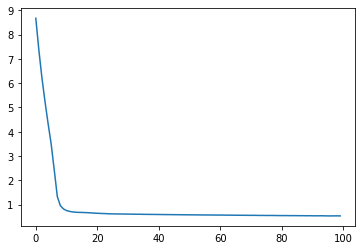

In [80]:
plt.plot(history.epoch,history.history.get("loss"))
#plot trainingtime and loss(binary)

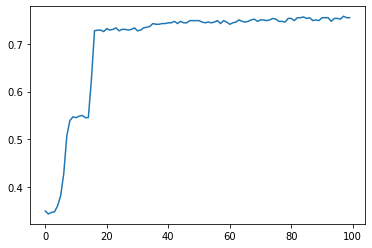

In [81]:
plt.plot(history.epoch,history.history.get("acc"))
#Success rate